# Natural Language Processing Project

In this NLP project I will attempt to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import pandas as pd
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv("yelp.csv")

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [5]:
df['text_lenght'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

**A grid of 5 histograms of text length based off of the star ratings.**

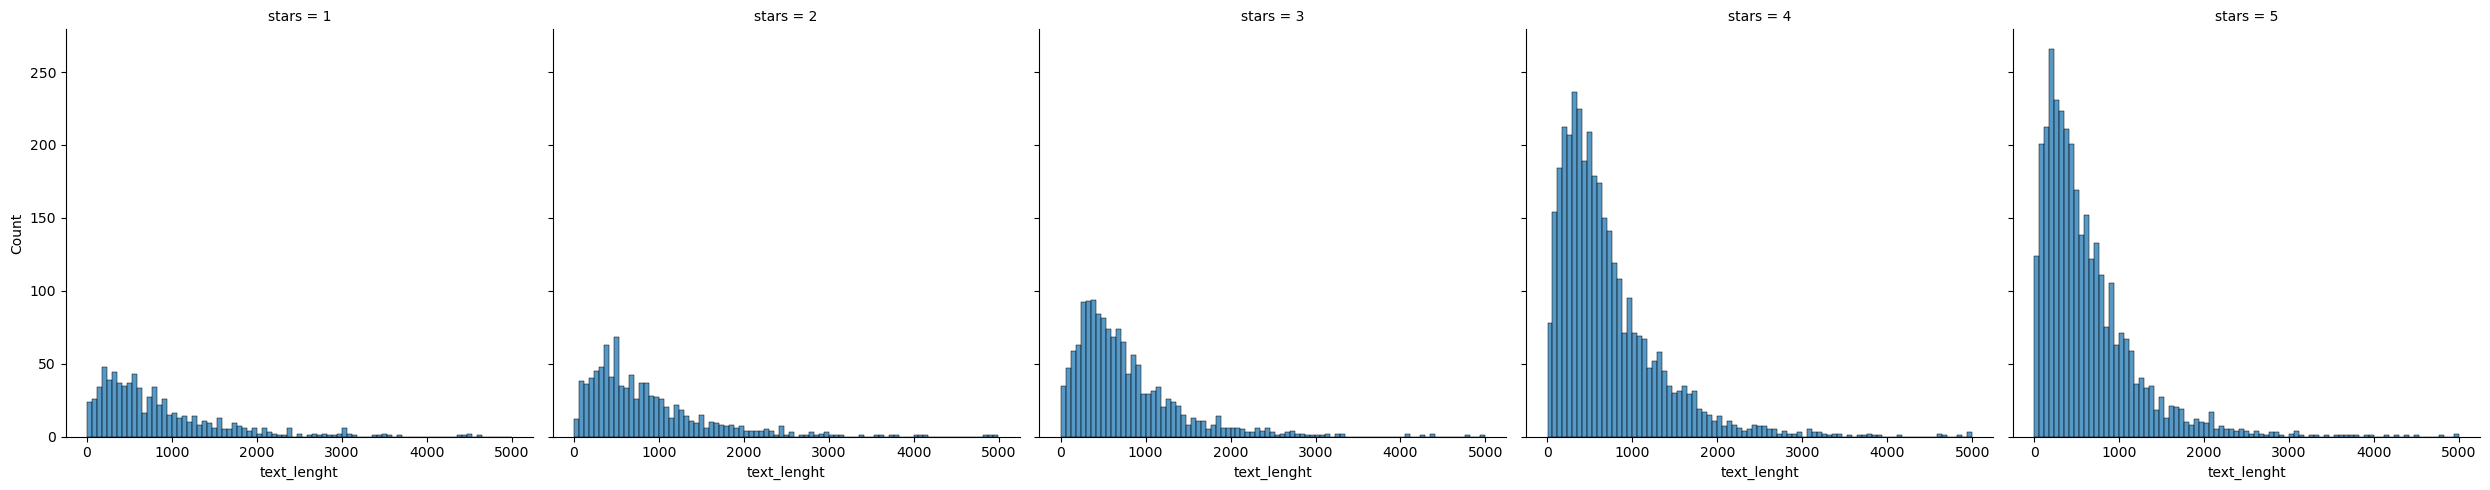

In [6]:
sns.displot(data = df, x ="text_lenght", col = "stars")

**A boxplot of text length for each star category.**

<Axes: xlabel='stars', ylabel='text_lenght'>

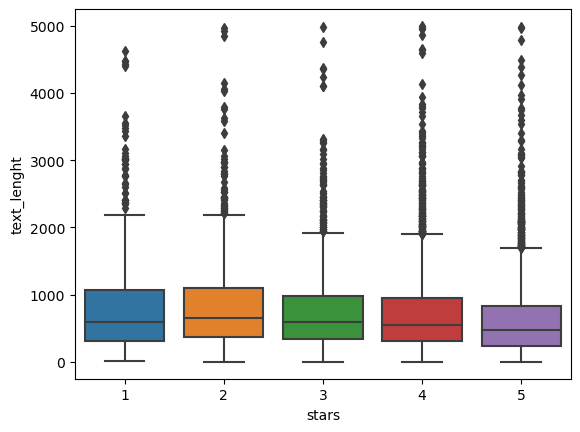

In [7]:
sns.boxplot(data = df, x ="stars",y = "text_lenght")

**A countplot of the number of occurrences for each type of star rating.**

<Axes: xlabel='stars', ylabel='count'>

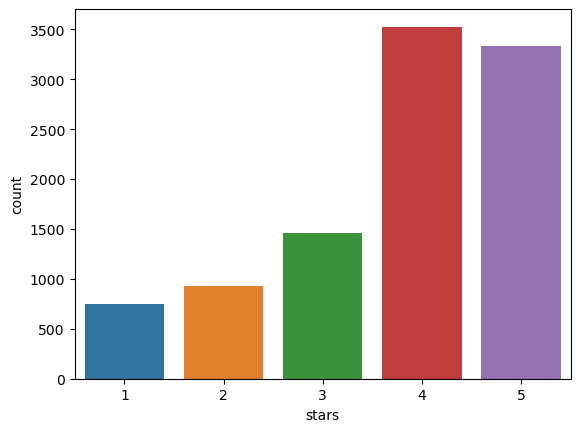

In [8]:
sns.countplot(data = df, x = "stars")

**Groupby to get the mean values of the numerical columns**

In [9]:
df.groupby('stars').mean()

/var/folders/cg/vf981v4x5tz8b5szmpt19_xm0000gp/T/ipykernel_18699/1788445910.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('stars').mean()


,cool,useful,funny,text_lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Get the correlation between the numerical variables**

In [10]:
df.groupby('stars').mean().corr()

/var/folders/cg/vf981v4x5tz8b5szmpt19_xm0000gp/T/ipykernel_18699/1506866820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('stars').mean().corr()


,cool,useful,funny,text_lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_lenght,-0.857664,0.699881,0.843461,1.000000


**Correlation heatmap**

/var/folders/cg/vf981v4x5tz8b5szmpt19_xm0000gp/T/ipykernel_18699/10811631.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(df.groupby('stars').mean().corr(), annot=True, cmap='BrBG')


<Axes: >

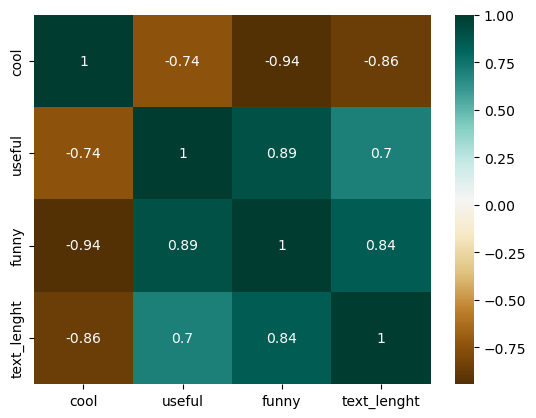

In [11]:
sns.heatmap(df.groupby('stars').mean().corr(), annot=True, cmap='BrBG')

# NLP Classification

**I will create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [12]:
yelp_class =  df[(df["stars"] == 1) | (df["stars"]== 5)]


In [13]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


**I will create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (The features and target/labels)**

In [14]:
X = yelp_class["text"]
y = yelp_class["stars"]

**Import CountVectorizer and create a CountVectorizer object.**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [16]:
X = cv.fit_transform(X)

In [17]:
print(X)
print(X.shape)

  (0, 11265)	2
  (0, 18735)	1
  (0, 17406)	1
  (0, 10635)	1
  (0, 8161)	2
  (0, 11821)	3
  (0, 1984)	1
  (0, 6864)	1
  (0, 2364)	1
  (0, 937)	8
  (0, 9114)	9
  (0, 18517)	8
  (0, 6123)	3
  (0, 17126)	10
  (0, 18585)	1
  (0, 12505)	1
  (0, 18672)	1
  (0, 10300)	2
  (0, 15422)	1
  (0, 12016)	1
  (0, 12054)	1
  (0, 17134)	4
  (0, 7715)	1
  (0, 921)	1
  (0, 407)	1
  :	:
  (4085, 9817)	1
  (4085, 10088)	1
  (4085, 9127)	1
  (4085, 10873)	1
  (4085, 2154)	1
  (4085, 183)	1
  (4085, 10907)	1
  (4085, 17416)	1
  (4085, 6370)	1
  (4085, 3314)	1
  (4085, 3329)	1
  (4085, 14423)	1
  (4085, 1442)	1
  (4085, 16134)	1
  (4085, 15944)	1
  (4085, 6651)	1
  (4085, 12298)	1
  (4085, 543)	1
  (4085, 17700)	1
  (4085, 2515)	1
  (4085, 189)	1
  (4085, 9624)	1
  (4085, 5510)	1
  (4085, 836)	1
  (4085, 15962)	1
(4086, 19183)


# Build the Model

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

**Import MultinomialNB and create an instance of the estimator and call is nb**

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Fit nb using the training data.**

In [21]:
s = nb.fit(X_train,y_train)

## Predictions and Evaluations

**Use the predict method off of nb to predict labels from X_test.**

In [22]:
predictions = s.predict(X_test)

**Create a confusion matrix and classification report using predictions and y_test **

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,predictions))
print("/")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

/
[[159  69]
 [ 22 976]]


**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

**Import TfidfTransformer from sklearn.**

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

**Import Pipeline from sklearn.**

In [26]:
from sklearn.pipeline import Pipeline

**Create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [30]:
pipeline = Pipeline([
('bow', CountVectorizer()),
('tfidf',TfidfTransformer()),
('classifier',MultinomialNB()),
])

## Using the Pipeline

**Time to use the pipeline! This pipeline has all the pre-process steps in it already, meaning I'll need to re-split the original data. Because I overwrote X as the CountVectorized version what I need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [27]:
X = yelp_class["text"]
y = yelp_class["stars"]

In [28]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. I need to pass in just the text and labels**

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Lets use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [32]:
predictions = pipeline.predict(X_test)

In [33]:
print(classification_report(y_test,predictions))
print("/")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

/
[[  0 228]
 [  0 998]]


/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! That is it for this project.